<h3>Data Overview</h3>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             600 non-null    int64  
 1   subject        599 non-null    object 
 2   body           600 non-null    object 
 3   answer         600 non-null    object 
 4   type           600 non-null    object 
 5   queue          600 non-null    object 
 6   priority       600 non-null    object 
 7   language       600 non-null    object 
 8   business_type  600 non-null    object 
 9   tag_1          600 non-null    object 
 10  tag_2          600 non-null    object 
 11  tag_3          600 non-null    object 
 12  tag_4          600 non-null    object 
 13  tag_5          432 non-null    object 
 14  tag_6          173 non-null    object 
 15  tag_7          56 non-null     object 
 16  tag_8          9 non-null      object 
 17  tag_9          0 non-null      float64
dtypes: float64

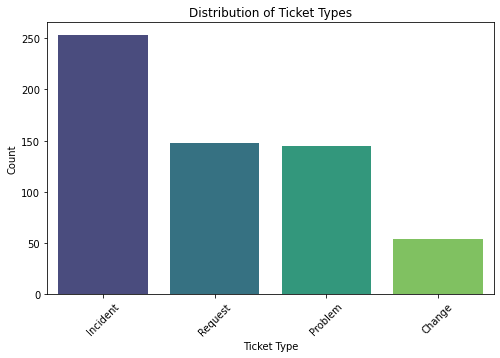

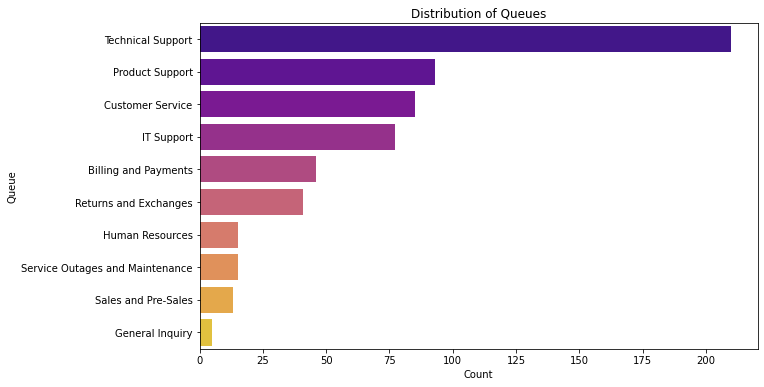

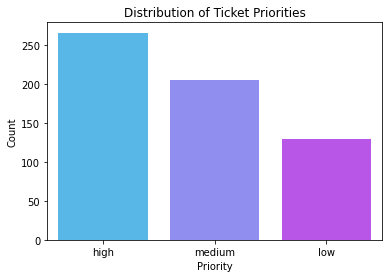

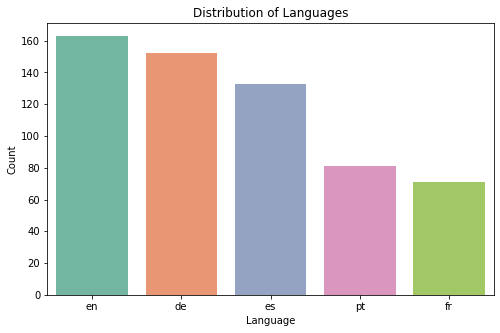

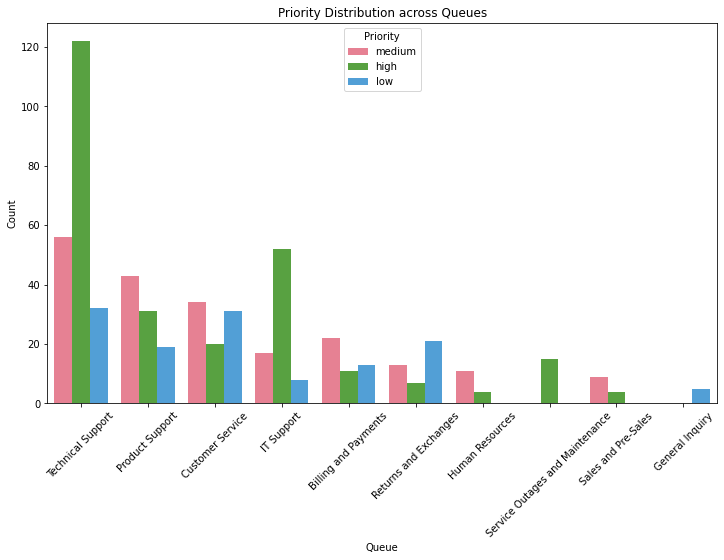

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def summarize_dataframe(df):
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    categorical_cols = ['type', 'queue', 'priority', 'language']
    for col in categorical_cols:
        print(f"\nDistribution of {col}:\n", df[col].value_counts())

def plot_distributions(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='type', data=df, palette='viridis', order=df['type'].value_counts().index)
    plt.title('Distribution of Ticket Types')
    plt.xlabel('Ticket Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.countplot(y='queue', data=df, palette='plasma', order=df['queue'].value_counts().index)
    plt.title('Distribution of Queues')
    plt.xlabel('Count')
    plt.ylabel('Queue')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.countplot(x='priority', data=df, palette='cool', order=df['priority'].value_counts().index)
    plt.title('Distribution of Ticket Priorities')
    plt.xlabel('Priority')
    plt.ylabel('Count')
    plt.show()
    
    plt.figure(figsize=(8, 5))
    sns.countplot(x='language', data=df, palette='Set2', order=df['language'].value_counts().index)
    plt.title('Distribution of Languages')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.show()
    
    plt.figure(figsize=(12, 7))
    sns.countplot(x='queue', hue='priority', data=df, palette='husl', order=df['queue'].value_counts().index)
    plt.title('Priority Distribution across Queues')
    plt.xlabel('Queue')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Priority')
    plt.show()

def preprocess_null_values(df):
    df['subject'].fillna('No Subject', inplace=True)
    for col in ['tag_5', 'tag_6', 'tag_7', 'tag_8']:
        df[col].fillna('Unknown', inplace=True)
    df.drop(columns=['tag_9'], inplace=True)  # Drop column with all null values
    return df

if __name__ == "__main__":
    df = load_data('helpdesk_customer_tickets.csv')
    summarize_dataframe(df)
    plot_distributions(df)
    df = preprocess_null_values(df)

In [3]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,Unknown,Unknown,Unknown,Unknown
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,Unknown,Unknown
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,Unknown,Unknown,Unknown,Unknown
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Training Request,Unknown,Unknown,Unknown
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Problem Resolution,Account Assistance,Unknown,Unknown


<h2>Data Preprocessing</h2>

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W', ' ', text).lower()
    words = word_tokenize(text)
    return ' '.join(word for word in words if word not in stop_words)

def preprocess_data(df):
    df['cleaned_body'] = df['body'].apply(clean_text)
    return df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
